In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
img = image.load_img("C:/Users/Kiran/Desktop/Base data/Training/Signal_ahead/1.png")

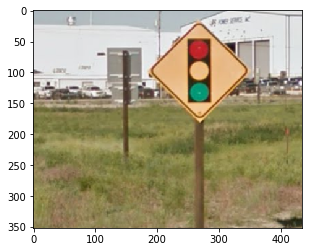

In [5]:
plt.imshow(img)

In [6]:
cv2.imread("C:/Users/Kiran/Desktop/Base data/Training/Signal_ahead/1.png").shape

(352, 435, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [9]:
train_dataset = train.flow_from_directory('C:/Users/Kiran/Desktop/Base data/Training',
                                          target_size = (300,300),
                                          batch_size = 3,
                                          class_mode ='binary')
Validation_dataset = train.flow_from_directory('C:/Users/Kiran/Desktop/Base data/Validation',
                                          target_size = (300,300),
                                           batch_size = 3,
                                           class_mode ='binary')

Found 17 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'Signal_ahead': 0, 'Stop_sign': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                    ])

In [13]:
from tensorflow.keras import optimizers
model.compile(
              loss='binary_crossentropy', 
              
              optimizer = optimizers.RMSprop(lr=0.001),
              
              metrics = ['accuracy'])

In [24]:
history = model.fit(train_dataset,steps_per_epoch=6,epochs=30,
                      validation_data = Validation_dataset)

Epoch 1/30
6/6 [==============================] - 4s 743ms/step - loss: 2.2275e-06 - accuracy: 1.0000 - val_loss: 4.9428e-06 - val_accuracy: 1.0000
Epoch 2/30
6/6 [==============================] - 4s 719ms/step - loss: 5.6784e-08 - accuracy: 1.0000 - val_loss: 4.0825e-06 - val_accuracy: 1.0000
Epoch 3/30
6/6 [==============================] - 5s 751ms/step - loss: 4.9456e-08 - accuracy: 1.0000 - val_loss: 4.0373e-06 - val_accuracy: 1.0000
Epoch 4/30
6/6 [==============================] - 4s 709ms/step - loss: 5.3313e-08 - accuracy: 1.0000 - val_loss: 6.7755e-06 - val_accuracy: 1.0000
Epoch 5/30
6/6 [==============================] - 4s 735ms/step - loss: 5.0120e-08 - accuracy: 1.0000 - val_loss: 4.9550e-06 - val_accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 4s 744ms/step - loss: 3.2327e-08 - accuracy: 1.0000 - val_loss: 3.3406e-06 - val_accuracy: 1.0000
Epoch 7/30
6/6 [==============================] - 4s 742ms/step - loss: 2.3391e-08 - accuracy: 1.0000 - val_loss

In [25]:
Validation_dataset.class_indices

{'Signal_ahead': 0, 'Stop_sign': 1}

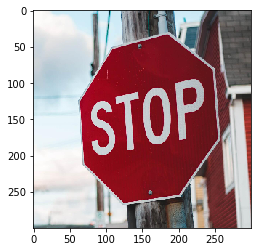

[[1.]]
Stop


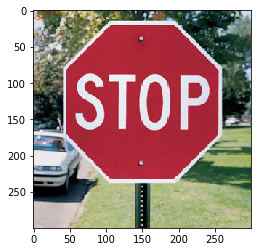

[[0.9999897]]
Stop


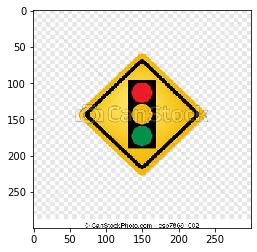

[[0.]]
Signal_ahead


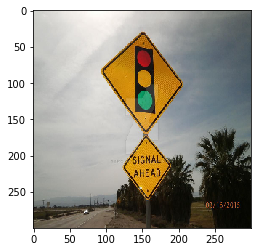

[[0.]]
Signal_ahead


In [27]:
dir_path = 'C:/Users/Kiran/Desktop/Base data/testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(300,300))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    if (val == 0):
        print("Signal_ahead")
    else:
        print("Stop")